# Exploring with filtered CSV

## Simple barcharts

In [2]:
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [3]:
rvDf = pd.read_csv('data/join_rv_gent.csv')
rvDf.head()

,id,date,reviewer_id,comments,listing_url,last_scraped,description,neighborhood_overview,host_id,latitude_left,...,location,longitude_right,name,name_1,set,slug,slug_1,sqmi,type,Score
0,27360,2010-02-22,8289,Janet is such an incredible sweetheart. She is...,https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
1,29076,2010-03-11,89581,Cosy and quite room. Wake up with the sun comi...,https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
2,32586,2010-03-31,100054,"Janet is very accommodating, and the bedroom a...",https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
3,54442,2010-06-18,122427,I stayed with Janet for 2 weeks and it was gre...,https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
4,58138,2010-06-27,67499,Janet has the best clothing is super friendly ...,https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0


In [4]:
top_N = 20
newStopWords= ['<','>','/','br',',','.','b','/b','space','room','!','private','access','kitchen',')','guest','(','&','bedroom','house','apartment','home','bed','2','living','located','-','bathroom',"*",'one','\'s',':','full','la','note','1','large','\'','\‘','\’','\'m','—','los angeles', 'would', 'us']

In [5]:
def wordbarchart(txt):
    words = nltk.tokenize.word_tokenize(txt)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(newStopWords)
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    ax = rslt.plot.bar(color="deeppink", stacked=True)

<ipython-input-6-7cd30b60ca5c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = rvDf.comments.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


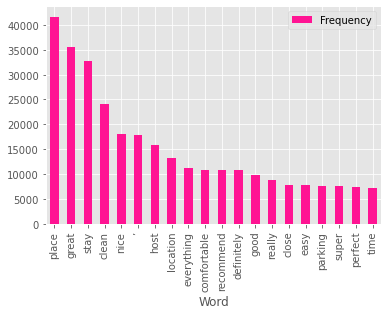

In [6]:
txt = rvDf.comments.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')    
wordbarchart(txt)

In [7]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)

In [8]:
rvDf[rvDf['comments'].str.contains('parking') == True]

,id,date,reviewer_id,comments,listing_url,last_scraped,description,neighborhood_overview,host_id,latitude_left,...,location,longitude_right,name,name_1,set,slug,slug_1,sqmi,type,Score
3,54442,2010-06-18,122427,"I stayed with Janet for 2 weeks and it was great! Since this was my first experience with airbnb, I really lucked out! The room was very neat, and having my own bathroom right next to the room was a great plus. There's lots of space (counter around the sink and top of built-in dresser) in the bathroom to spread out your toiletries. Bathtub/shower is nice. My favorite thing was probably the lightning-fast internet! I wish I had that at home!\r\n\r\nJust as she says, Janet spent most of her time upstairs when she was home, but I was gone a lot, and she was too. I wish we had had more time to get to know one another! I thought it might be a drawback not having a TV in the room, but I was on the go so much, I didn't really miss it! If you have your laptop, you can watch TV online!\r\n\r\nStreet parking can be difficult in the evenings, but Janet was very accomodating to work out a system. All in all, it was a very positive experience! I definitely look forward to staying with Janet again!",https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant in Silverlake! ten minutes walk to Sunset Junction and all the shops on Sunset Boulevard in the heart of Silverlake. Cafecito Organico, the best coffee shop in Silverlake also one block away! Whole house water filter, which means the water everywhere in the house is purified to the highest quality water possible in California!<br /><br /><b>The space</b><br />Private bedroom with your own full bath in my charming 1920's house in Silverlake. Walking distance to Sunset Junction, tons of fun eateries and shops. Beautiful neighborhood, Farmer's market on Saturdays. The room has hardwood floors, a queen bed, rack for clothes and a desk and chair. Also the room has french doors that open up to the front deck and front yard. I live mostly upstairs, so there is alot of privacy. The room is on the first floor off of the kitchen. You will get your own bathroom right next to the room that is all yours. Any questions, please feel free to ema",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
20,190772,2011-03-01,365461,"Great big house in easy to find good part of Silverlake, walking distance from Sunset Junction, where there are cool vintage shops, coffee shops, health food stores and more. \r\nNice big room, with doors that open up to private patio and wonderful back yard with big bamboo blowing in the wind. Easy parking. Driveway not as steep as I was told, easy pezy. Warm and toasty for cold nights in LA (Central heat) and cool by day Easterly views/sun in AM mostly. Totally recommend it.",https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant in Silverlake! ten minutes walk to Sunset Junction and all the shops on Sunset Boulevard in the heart of Silverlake. Cafecito Organico, the best coffee shop in Silverlake also one block away! Whole house water filter, which means the water everywhere in the house is purified to the highest quality water possible in California!<br /><br /><b>The space</b><br />Private bedroom with your own full bath in my charming 1920's house in Silverlake. Walking distance to Sunset Junction, tons of fun eateries and shops. Beautiful neighborhood, Farmer's market on Saturdays. The room has hardwood floors, a queen bed, rack for clothes and a desk and chair. Also the room has french doors that open up to the front deck and front yard. I live mostly upstairs, so there is alot of privacy. The room is on the first floor off of the kitchen. You will get your own bathroom right next to the room that is all yours. Any questions, please feel free to ema",NaN,75052,34.08517,...

'street parking can be difficult in the evening'   
'easy parking'   
'parking was the only problem'   
'limited parking'

In [9]:
type(txt)

str

## Topic Modeling

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [12]:
import re

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]

# we did this in two steps before, but it's simpler to avoid creating the intermediate list of words

# this is a nested list comprehension. In the outer list, we loop over CAPs
# in the inner list, we loop over words in that CAP
wordlists = [word for word in word_tokenize(txt.lower()) if word not in swords]

# wordlists = []
# for cap in caps:
   # wl2 = []
   # wl = word_tokenize(cap.lower())
   # for word in wl:
       # if word not in swords:
           # wl2.append(word)
   # wordlists.append(wl2)

#print(wordlists[0][10000:10050])
#print(wordlists[1][10000:10050])

In [17]:
import gensim
help(gensim.models.LdaMulticore)

Help on class LdaMulticore in module gensim.models.ldamulticore:

class LdaMulticore(gensim.models.ldamodel.LdaModel)
 |  LdaMulticore(corpus=None, num_topics=100, id2word=None, workers=None, chunksize=2000, passes=1, batch=False, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, random_state=None, minimum_probability=0.01, minimum_phi_value=0.01, per_word_topics=False, dtype=<class 'numpy.float32'>)
 |  
 |  An optimized implementation of the LDA algorithm, able to harness the power of multicore CPUs.
 |  Follows the similar API as the parent class :class:`~gensim.models.ldamodel.LdaModel`.
 |  
 |  Method resolution order:
 |      LdaMulticore
 |      gensim.models.ldamodel.LdaModel
 |      gensim.interfaces.TransformationABC
 |      gensim.utils.SaveLoad
 |      gensim.models.basemodel.BaseTopicModel
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, corpus=None, num_topics=100, id2word=None, workers=

In [18]:
dictionary = gensim.corpora.Dictionary(wordlists)
corpus = [dictionary.doc2bow(wl) for wl in wordlists]
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, alpha = 0.9, eta=0.9)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string